<a href="https://colab.research.google.com/github/jeeda4/ML_Project/blob/master/ML_Project(Model2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Project

Second Model: Multi-Layer Perceptron Neural Network Model

Spring 2020 




In [0]:
#setting up 
import numpy as np
import pandas as pd

In [0]:
#loading in data 
#Importing the data
Regression_data = pd.read_csv ("https://raw.githubusercontent.com/GuiZamorano/Instagram_Like_Predictor/master/InstagramDatasetRegression.csv", encoding='utf-8-sig')

In [3]:
Regression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20668 entries, 0 to 20667
Data columns (total 47 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   edge_felix_video_timeline                    20668 non-null  int64  
 1   edge_follow                                  20668 non-null  int64  
 2   edge_followed_by                             20668 non-null  int64  
 3   edge_owner_to_timeline_media                 20668 non-null  int64  
 4   highlight_reel_count                         20668 non-null  int64  
 5   is_business_account                          20668 non-null  bool   
 6   is_verified                                  20668 non-null  bool   
 7   comments_disabled                            20668 non-null  bool   
 8   is_video                                     20668 non-null  bool   
 9   time_between                                 20668 non-null  float64
 10

In [4]:
Regression_data.head(50)

,edge_felix_video_timeline,edge_follow,edge_followed_by,edge_owner_to_timeline_media,highlight_reel_count,is_business_account,is_verified,comments_disabled,is_video,time_between,number_of_likes/mean,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,hour_of_day,hr_sin,hr_cos,"(0, 4]","(4, 8]","(8, 12]","(12, 16]","(16, 20]","(20, 24]",Auto Dealers,Business & Utility Services,Content & Apps,Creators & Celebrities,Food & Personal Goods,General Interest,Government Agencies,Grocery & Convenience Stores,Home & Auto,Home Goods Stores,Home Services,Lifestyle Services,Local Events,Non-Profits & Religious Organizations,Personal Goods & General Merchandise Stores,Professional Services,Publishers,Transportation & Accomodation Services,mean_likes,mean_comments
0,0,11,1927598,19,0,False,True,False,False,1072428.0,0.697678,0,0,0,0,0,1,0,12,1.224647e-16,-1.000000e+00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,759069.545455,25191.272727
1,0,11,1927598,19,0,False,True,False,False,60664.0,1.132276,0,0,0,0,1,0,0,2,5.000000e-01,8.660254e-01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,759069.545455,25191.272727
2,0,11,1927598,19,0,False,True,False,False,458221.0,0.641902,0,0,0,0,0,0,1,9,7.071068e-01,-7.071068e-01,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,759069.545455,25191.272727
3,0,11,1927598,19,0,False,True,False,False,1894759.0,1.072790,1,0,0,0,0,0,0,1,2.588190e-01,9.659258e-01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,759069.545455,25191.272727
4,0,11,1927598,19,0,False,True,False,False,409972.0,1.059753,0,0,0,0,1,0,0,3,7.071068e-01,7.071068e-01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,759069.545455,25191.272727
5,0,11,1927598,19,0,False,True,False,False,438860.0,1.177626,0,0,1,0,0,0,0,9,7.071068e-01,-7.071068e-01,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,759069.545455,25191.272727
6,0,11,1927598,19,0,False,True,False,False,177578.0,1.101678,0,1,0,0,0,0,0,7,9.659258e-01,-2.588190e-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,759069.545455,25191.272727
7,0,11,1927598,19,0,False,True,False,False,84033.0,1.154272,0,0,1,0,0,0,0,5,9.659258e-01,2.588190e-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,759069.545455,25191.272727
8,0,11,1927598,19,0,False,True,False,False,14841.0,1.012914,1,0,0,0,0,0,0,6,1.000000e+00,6.123234e-17,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,759069.545455,25191.272727
9,0,11,1927598,19,0,False,True,False,False,62623.0,1.057489,1,0,0,0,0,0,0,2,5.000000e-01,8.660254e-01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,759069.545455,25191.272727


In [0]:
from sklearn.preprocessing import MinMaxScaler
continuous = ["edge_felix_video_timeline", "edge_follow", "edge_followed_by", "edge_owner_to_timeline_media", "highlight_reel_count", "time_between", "hour_of_day", "hr_sin", "hr_cos", "mean_likes", "mean_comments"]
 
# performin min-max scaling each continuous feature column to the range [0, 1]
cs = MinMaxScaler()
Data_Continuous = cs.fit_transform(Regression_data[continuous])

In [0]:
Data_Continuous_df = pd.DataFrame(Data_Continuous, columns=continuous)

In [7]:
Data_Continuous_df.head(5)

,edge_felix_video_timeline,edge_follow,edge_followed_by,edge_owner_to_timeline_media,highlight_reel_count,time_between,hour_of_day,hr_sin,hr_cos,mean_likes,mean_comments
0,0.0,0.001518,0.006556,0.00042,0.0,0.016311,0.521739,0.500000,0.000000,0.076599,0.071947
1,0.0,0.001518,0.006556,0.00042,0.0,0.000923,0.086957,0.750000,0.933013,0.076599,0.071947
2,0.0,0.001518,0.006556,0.00042,0.0,0.006969,0.391304,0.853553,0.146447,0.076599,0.071947
3,0.0,0.001518,0.006556,0.00042,0.0,0.028818,0.043478,0.629410,0.982963,0.076599,0.071947
4,0.0,0.001518,0.006556,0.00042,0.0,0.006235,0.130435,0.853553,0.853553,0.076599,0.071947


In [0]:
Regression_data_continuous = Regression_data.drop(continuous,axis=1)

In [0]:
Regression_data_continuous = pd.concat([Regression_data_continuous, Data_Continuous_df], axis = 1)

In [10]:
Regression_data_continuous.head(5)

,is_business_account,is_verified,comments_disabled,is_video,number_of_likes/mean,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,"(0, 4]","(4, 8]","(8, 12]","(12, 16]","(16, 20]","(20, 24]",Auto Dealers,Business & Utility Services,Content & Apps,Creators & Celebrities,Food & Personal Goods,General Interest,Government Agencies,Grocery & Convenience Stores,Home & Auto,Home Goods Stores,Home Services,Lifestyle Services,Local Events,Non-Profits & Religious Organizations,Personal Goods & General Merchandise Stores,Professional Services,Publishers,Transportation & Accomodation Services,edge_felix_video_timeline,edge_follow,edge_followed_by,edge_owner_to_timeline_media,highlight_reel_count,time_between,hour_of_day,hr_sin,hr_cos,mean_likes,mean_comments
0,False,True,False,False,0.697678,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.001518,0.006556,0.00042,0.0,0.016311,0.521739,0.500000,0.000000,0.076599,0.071947
1,False,True,False,False,1.132276,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.001518,0.006556,0.00042,0.0,0.000923,0.086957,0.750000,0.933013,0.076599,0.071947
2,False,True,False,False,0.641902,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.001518,0.006556,0.00042,0.0,0.006969,0.391304,0.853553,0.146447,0.076599,0.071947
3,False,True,False,False,1.072790,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.001518,0.006556,0.00042,0.0,0.028818,0.043478,0.629410,0.982963,0.076599,0.071947
4,False,True,False,False,1.059753,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.001518,0.006556,0.00042,0.0,0.006235,0.130435,0.853553,0.853553,0.076599,0.071947


In [11]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
# define MLP network
model1 = Sequential()
model1.add(Dense(64, input_dim=46, activation="relu"))
model1.add(Dense(32, activation="relu"))
model1.add(Dense(16, activation="relu"))
model1.add(Dense(8, activation="relu"))
model1.add(Dense(4, activation="relu"))
model1.add(Dense(1, activation="linear"))

Using TensorFlow backend.


In [0]:
from sklearn.model_selection import train_test_split
X = Regression_data_continuous
maxPrice = X["number_of_likes/mean"].max()
Y = X["number_of_likes/mean"] / maxPrice
Y = Y.values
X = X.drop('number_of_likes/mean', axis = 1).values
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=42)

In [0]:
from keras.optimizers import Adam
opt = Adam(lr=1e-4, decay=1e-4 / 200)
model1.compile(loss="mean_squared_error", optimizer=opt)

In [45]:
model1.fit(X_train, Y_train, validation_data=(X_test, Y_test),
	epochs=30, batch_size=8)


Train on 16534 samples, validate on 4134 samples
Epoch 1/30
16534/16534 [==============================] - 3s 205us/step - loss: 0.0063 - val_loss: 0.0075
Epoch 2/30
16534/16534 [==============================] - 3s 181us/step - loss: 0.0062 - val_loss: 0.0075
Epoch 3/30
16534/16534 [==============================] - 3s 193us/step - loss: 0.0062 - val_loss: 0.0075
Epoch 4/30
16534/16534 [==============================] - 3s 198us/step - loss: 0.0062 - val_loss: 0.0075
Epoch 5/30
16534/16534 [==============================] - 3s 201us/step - loss: 0.0062 - val_loss: 0.0075
Epoch 6/30
16534/16534 [==============================] - 4s 213us/step - loss: 0.0062 - val_loss: 0.0076
Epoch 7/30
16534/16534 [==============================] - 3s 193us/step - loss: 0.0062 - val_loss: 0.0076
Epoch 8/30
16534/16534 [==============================] - 3s 195us/step - loss: 0.0062 - val_loss: 0.0076
Epoch 9/30
16534/16534 [==============================] - 3s 185us/step - loss: 0.0062 - val_loss: 0.00

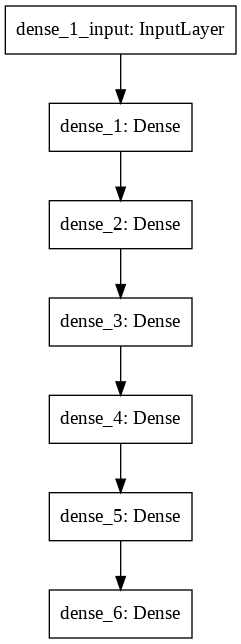

In [49]:
from keras.utils.vis_utils import plot_model
plot_model(model1, to_file='model.png')

In [50]:
model1.get_config()

{'layers': [{'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 46),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'distribution': 'uniform',
      'mode': 'fan_avg',
      'scale': 1.0,
      'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_1',
    'trainable': True,
    'units': 64,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'distribution': 'uniform',
      'mode': '

In [51]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                3008      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 5,793
Trainable params: 5,793
Non-trainable params: 0
____________________________________________________

In [15]:
preds1 = model1.predict(X_test)
diff1 = preds1.flatten() - Y_test
Yitemindex = np.where(Y_test==0)
Yitemindex

(array([ 611,  626, 1418, 2078, 3107]),)

In [16]:
minVal = np.amin(Y_test[Y_test != np.amin(Y_test)])
print(minVal)
np.put(Y_test, 611, minVal)
np.put(Y_test, 626, minVal)
np.put(Y_test, 1418, minVal)
np.put(Y_test, 2078, minVal)
np.put(Y_test, 3107, minVal)

0.008646305557331068


In [17]:
percentDiff1 = (diff1 / Y_test) * 100

absPercentDiff1 = np.abs(percentDiff1)
mean1 = np.mean(absPercentDiff1)
std1 = np.std(absPercentDiff1)
 
import locale
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
print("avg likes/mean:")
print(Regression_data_continuous["number_of_likes/mean"].mean())
print("std likes/mean:")
print(Regression_data_continuous["number_of_likes/mean"].std())
print("mean absolute percentage difference: {:.2f}%, std absolute percentage difference.: {:.2f}%".format(mean1, std1))

avg likes/mean:
1.0000000000000009
std likes/mean:
0.5068692569675557
mean absolute percentage difference: 55.65%, std absolute percentage difference.: 122.58%


In [18]:
from sklearn import metrics
preds_full = model1.predict(X)
print(np.sqrt(metrics.mean_squared_error(Y_test, preds1)))
print(np.sqrt(metrics.mean_squared_error(Y, preds_full)))

0.08661864282127864
0.08028847554106906


In [19]:
print(metrics.r2_score(Y_test, preds1))
print(metrics.r2_score(Y, preds_full))

0.016317641394619886
0.10047161494088286


In [38]:
print(metrics.mean_squared_error(Y_test, preds1))
print(metrics.mean_squared_error(Y, preds_full))

0.007502789284200244
0.6960406202018038


In [0]:
preds_full = preds_full.reshape((20668,))

In [0]:
Y1 = Regression_data_continuous["number_of_likes/mean"] 

preds_full = preds_full * maxPrice

In [22]:
compare = pd.DataFrame({'Prediction': preds_full, 'Actual' : Y1})
compare.head(5)

,Prediction,Actual
0,1.081486,0.697678
1,1.035359,1.132276
2,1.074424,0.641902
3,1.025233,1.072790
4,1.039270,1.059753
5,1.059591,1.177626
6,1.056719,1.101678
7,1.071589,1.154272
8,1.046939,1.012914
9,1.016196,1.057489


In [0]:
Small_difference = abs((Regression_data_continuous["number_of_likes/mean"].values) - preds_full)  < 0.08
med_difference = abs((Regression_data_continuous["number_of_likes/mean"].values) - preds_full)  < 0.25
Big_difference = abs((Regression_data_continuous["number_of_likes/mean"].values) - preds_full)  > 0.5

In [42]:
Regression_data_continuous[Small_difference].shape[0]

3458

In [43]:
Regression_data_continuous[med_difference].shape[0]

10046

In [44]:
Regression_data_continuous[Big_difference].shape[0]

4414

In [0]:
idx_vals = Regression_data_continuous[Small_difference].index.values
idx_big_vals = Regression_data_continuous[Big_difference].index.values

In [0]:
compare1 = compare.iloc[idx_vals]
compare2 = compare.iloc[idx_big_vals]

In [29]:
compare1.head(5)

,Prediction,Actual
3,1.025233,1.072790
4,1.039270,1.059753
6,1.056719,1.101678
8,1.046939,1.012914
9,1.016196,1.057489
14,1.062707,1.102865
19,0.977156,0.955169
41,0.939464,0.936587
58,1.107273,1.084068
68,1.022857,1.066573


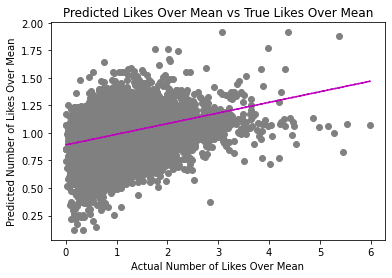

In [33]:
from  matplotlib import pyplot 
pyplot.scatter(Regression_data_continuous["number_of_likes/mean"].values, preds_full, color="grey")
z = np.polyfit(Regression_data_continuous["number_of_likes/mean"].values, preds_full, 1)
p = np.poly1d(z)
pyplot.plot(Regression_data_continuous["number_of_likes/mean"].values,p(Regression_data_continuous["number_of_likes/mean"].values),"r--", color="m")
pyplot.title("Predicted Likes Over Mean vs True Likes Over Mean")
pyplot.xlabel("Actual Number of Likes Over Mean")
pyplot.ylabel("Predicted Number of Likes Over Mean")
pyplot.show()